In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = (df['weight'] / (df['height']*0.01)) / ((df['height'])*0.01)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df.loc[df['overweight'] < 25, 'overweight'] =  0
df.loc[df['overweight'] >= 25, 'overweight'] = 1
df['overweight'] = df['overweight'].apply(np.int64)
df['cholesterol'] = df['cholesterol'].replace([1,2,3],[0,1,1])
df['gluc'] = df['gluc'].replace([1,2,3],[0,1,1])

# Draw Categorical Plot

def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'],
                 var_name = "variable", value_name = "value")

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    # Draw the catplot with 'sns.catplot()'
    # Get the figure for the output

    fig = sns.catplot(data=df_cat, x="variable", col="cardio", hue="value", kind="count")

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    
    return fig


# Draw Heat Map
def draw_heat_map():
    
    # Clean the data
    df_heat = df.loc[df['ap_lo'] <= df['ap_hi']]
    df_heat = df_heat.loc[df_heat['height'] >= df_heat['height'].quantile(0.025)]
    df_heat = df_heat.loc[df_heat['height'] <= df_heat['height'].quantile(0.975)]
    df_heat = df_heat.loc[df_heat['weight'] >= df_heat['weight'].quantile(0.025)]
    df_heat = df_heat.loc[df_heat['weight'] <= df_heat['weight'].quantile(0.975)]

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df_heat.corr()))

    # Calculate the correlation matrix
    corr = sns.heatmap(df_heat.corr(), annot=True, mask=mask)

    # Set up the matplotlib figure
    # Draw the heatmap with 'sns.heatmap()'
    fig = plt.figure(figsize=(6,4))

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

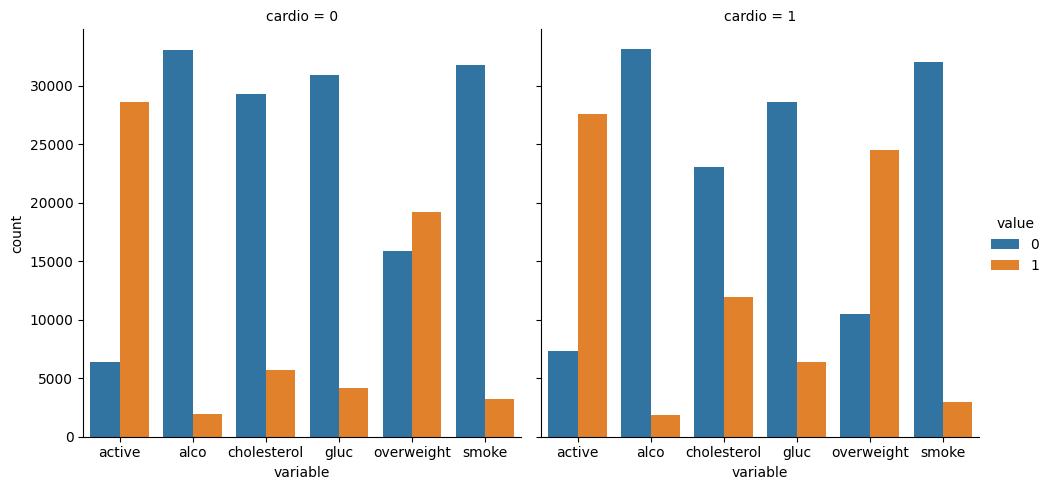

In [99]:
draw_cat_plot()

<Figure size 600x400 with 0 Axes>

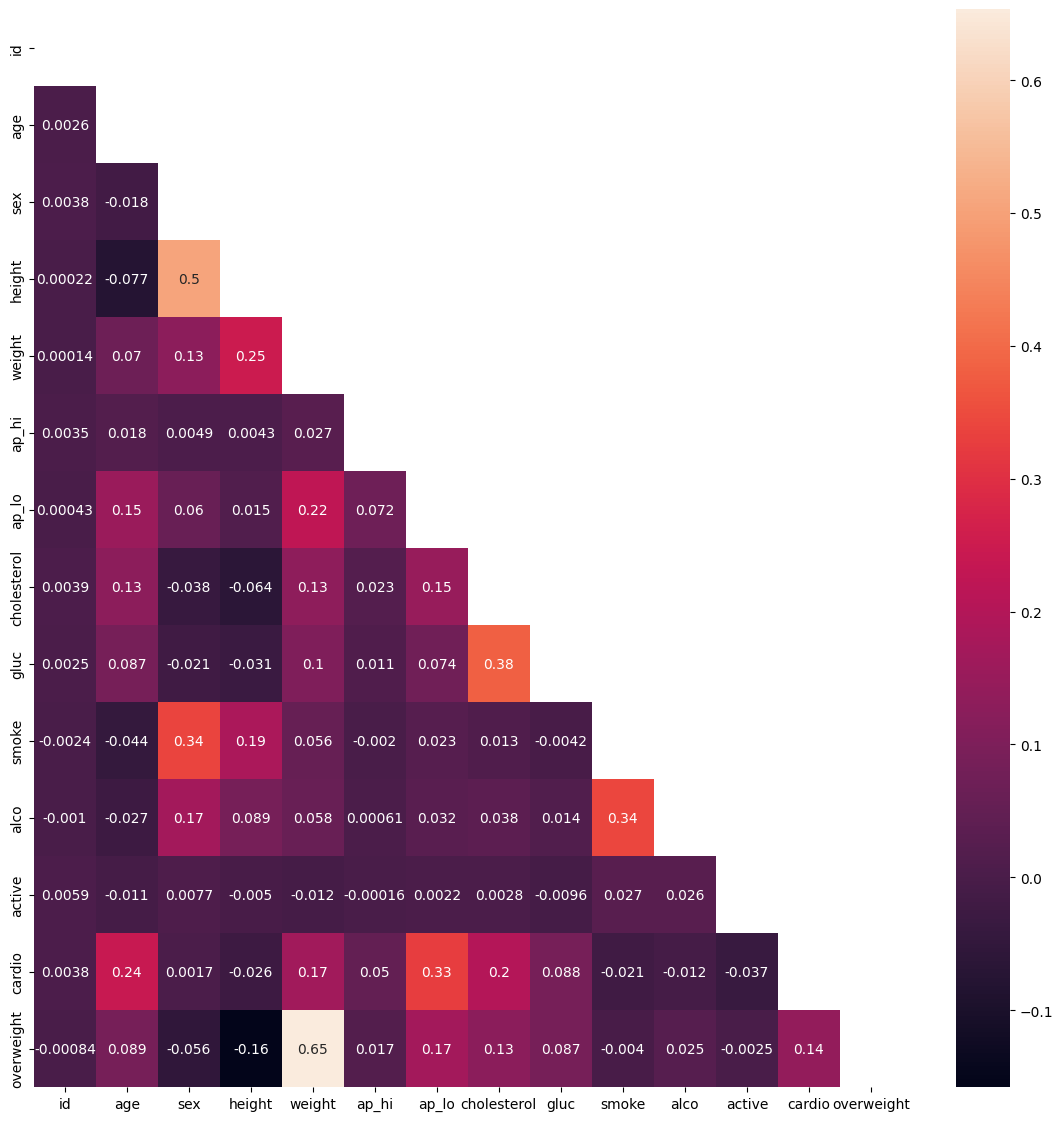

<Figure size 600x400 with 0 Axes>

In [100]:
draw_heat_map()

In [3]:
# Import data
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('medical_examination.csv')

In [4]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Add 'overweight' column
df['overweight'] = (df['weight'] / (df['height']*0.01)) / ((df['height'])*0.01)

In [6]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [7]:
df.loc[df['overweight'] < 25, 'overweight'] =  0
df.loc[df['overweight'] >= 25, 'overweight'] = 1
df['overweight'] = df['overweight'].apply(np.int64)

df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [8]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df['cholesterol'] = df['cholesterol'].replace([1,2,3],[0,1,1])
df['gluc'] = df['gluc'].replace([1,2,3],[0,1,1])

df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [7]:
df.dtypes

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
overweight       int64
dtype: object

In [9]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'],
                 var_name = "variable", value_name = "value")

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    # Draw the catplot with 'sns.catplot()'
    # Get the figure for the output
    fig = sns.catplot(data=df_cat, x="variable", col="cardio", hue="value", kind="count")

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    
    return fig

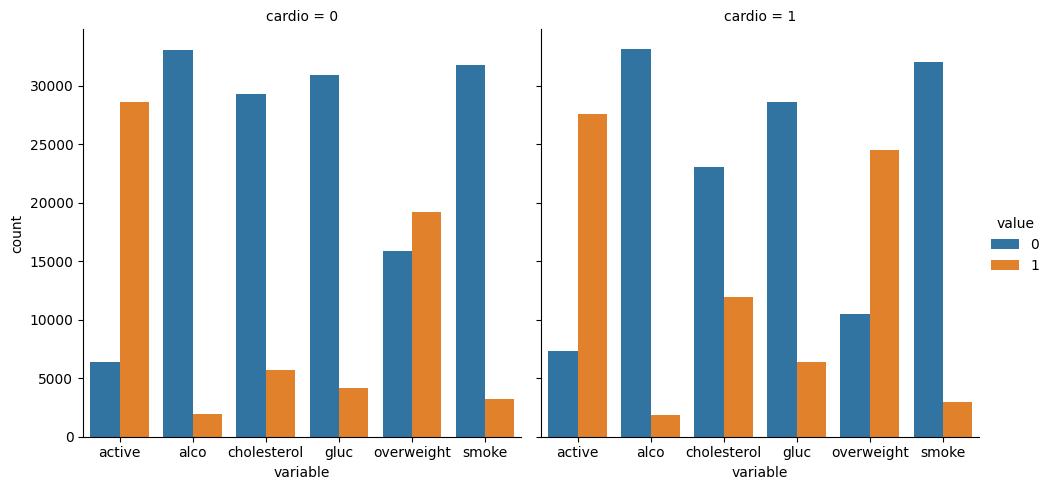

In [10]:
draw_cat_plot()

In [11]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'],
                 var_name = "variable", value_name = "value")

df_cat.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


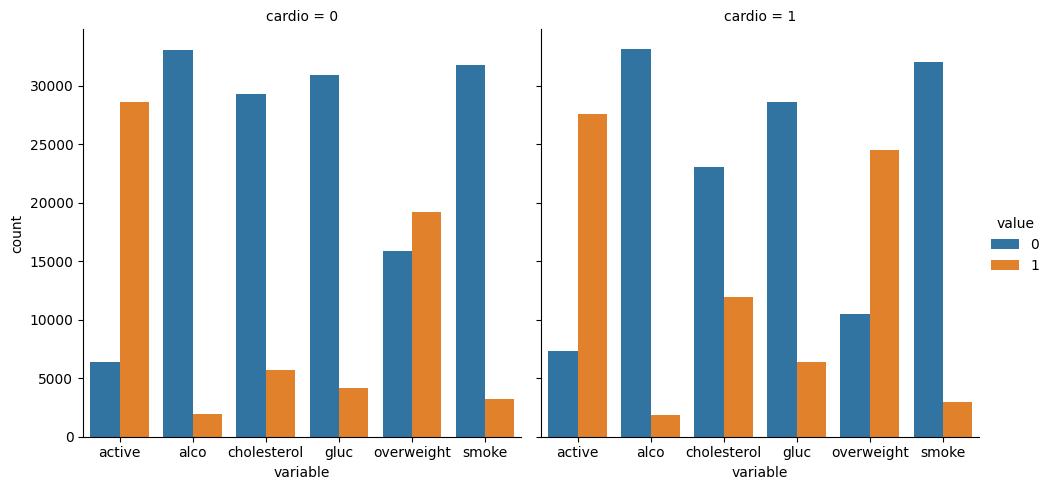

In [12]:
import seaborn as sns

sns.catplot(data=df_cat, x="variable", col="cardio", hue="value", kind="count")

In [1]:
# Draw Heat Map
def draw_heat_map():
    
    # Clean the data
    df_heat = None

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None



    # Set up the matplotlib figure
    fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'



    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

In [13]:
# Clean the data

df_heat = df.loc[df['ap_lo'] <= df['ap_hi']]
df_heat = df_heat.loc[df_heat['height'] >= df_heat['height'].quantile(0.025)]
df_heat = df_heat.loc[df_heat['height'] <= df_heat['height'].quantile(0.975)]
df_heat = df_heat.loc[df_heat['weight'] >= df_heat['weight'].quantile(0.025)]
df_heat = df_heat.loc[df_heat['weight'] <= df_heat['weight'].quantile(0.975)]

df_heat['weight'].mean()


73.48319396661569

In [96]:
import matplotlib.pyplot as plt

# Draw Heat Map
def draw_heat_map():
    
    # Clean the data
    df_heat = df.loc[df['ap_lo'] <= df['ap_hi']]
    df_heat = df_heat.loc[df_heat['height'] >= df_heat['height'].quantile(0.025)]
    df_heat = df_heat.loc[df_heat['height'] <= df_heat['height'].quantile(0.975)]
    df_heat = df_heat.loc[df_heat['weight'] >= df_heat['weight'].quantile(0.025)]
    df_heat = df_heat.loc[df_heat['weight'] <= df_heat['weight'].quantile(0.975)]

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df_heat.corr()))

    # Calculate the correlation matrix
    corr = sns.heatmap(df_heat.corr(), annot=True, mask=mask)

    # Set up the matplotlib figure
    # Draw the heatmap with 'sns.heatmap()'
    fig = plt.figure(figsize=(6,4))

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

<Figure size 600x400 with 0 Axes>

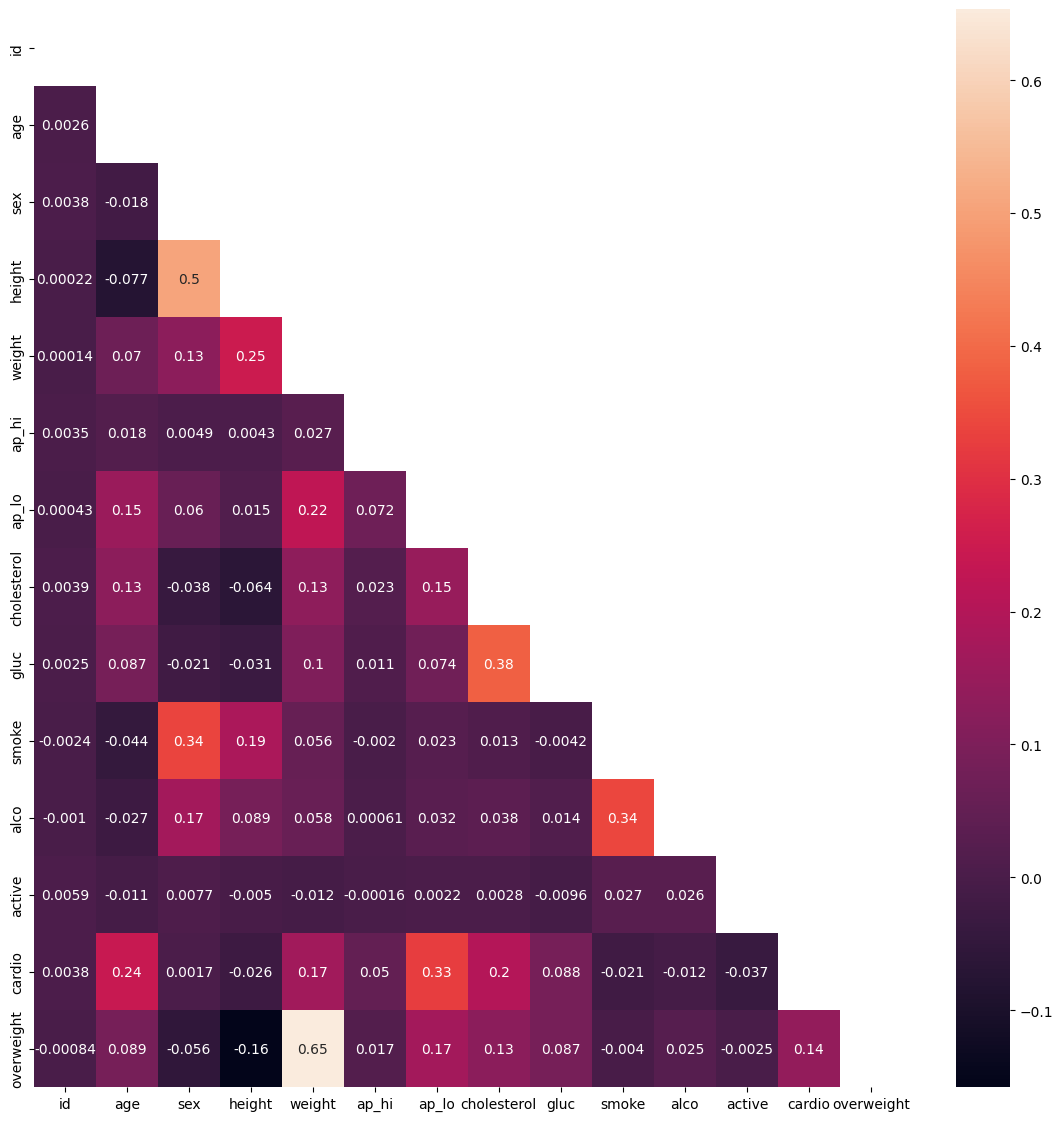

<Figure size 600x400 with 0 Axes>

In [97]:
draw_heat_map()

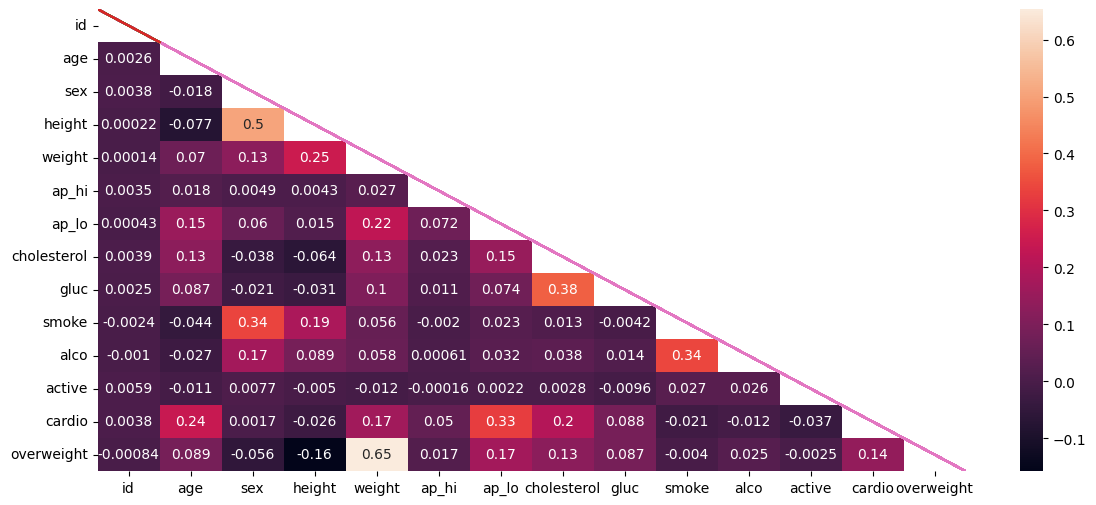

In [89]:
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(df_heat.corr()))
corr = sns.heatmap(df_heat.corr(), annot=True, mask=mask)
fig, ax = df_heat, df_heat
plt.rcParams["figure.figsize"] = (14,14)
plt.plot(fig, ax)
plt.show()